In [6]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import calmap
import geopandas as gpd
import contextily as ctx

In [7]:
noise = pd.read_csv("../../Data/dataset_incidentes_ruido_2024.csv")

In [8]:
noise['Complaint Type'].unique()

array(['Noise - Residential', 'Noise - Street/Sidewalk',
       'Noise - Commercial', 'Noise', 'Noise - Vehicle',
       'Noise - Helicopter', 'Noise - House of Worship', 'Noise - Park'],
      dtype=object)

In [9]:
noise['Descriptor'].unique()

array(['Loud Music/Party', 'Banging/Pounding', 'Loud Talking',
       'Noise: air condition/ventilation equipment (NV1)',
       'Noise: Alarms (NR3)', 'Car/Truck Music', 'Other', 'Engine Idling',
       'Car/Truck Horn', 'NYPD', 'Loud Television',
       'Noise: Construction Equipment (NC1)',
       'Noise: Jack Hammering (NC2)', 'Noise, Barking Dog (NR5)',
       'Noise: Construction Before/After Hours (NM1)',
       'Noise:  lawn care equipment (NCL)',
       'Noise: Private Carting Noise (NQ1)', 'News Gathering',
       'Noise, Other Animals (NR6)',
       'Noise: Other Noise Sources (Use Comments) (NZZ)',
       'Noise: Manufacturing Noise (NK1)', 'Noise, Ice Cream Truck (NR4)',
       'Noise: Boat(Engine,Music,Etc) (NR10)'], dtype=object)

In [10]:
noise = pd.read_csv("../../Data/dataset_incidentes_ruido_2024.csv")
# Filter noise Dataset with Complaint Type = Noise - Street/Sidewalk
noise = noise.loc[noise["Descriptor"] == "Engine Idling"]
noise.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
367,59892075,01/01/2024 01:18:06 AM,01/01/2024 01:57:26 AM,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,10453.0,2226 LORING PLACE NORTH,...,Van,NaN,NaN,NaN,NaN,NaN,NaN,40.859817,-73.910016,"(40.859817364320826, -73.91001607319848)"
385,59891136,01/01/2024 01:20:44 AM,01/01/2024 01:38:08 AM,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,10040.0,601 WEST 191 STREET,...,Car,NaN,NaN,NaN,NaN,NaN,NaN,40.855642,-73.929351,"(40.85564240936937, -73.92935055425096)"
429,59892985,01/01/2024 01:27:32 AM,01/01/2024 01:42:22 AM,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11375.0,108-49 UNION TURNPIKE,...,Car,NaN,NaN,NaN,NaN,NaN,NaN,40.708615,-73.844744,"(40.70861452699336, -73.84474373676021)"
1202,59894106,01/01/2024 04:58:49 AM,01/01/2024 11:31:26 AM,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,11419.0,94-11 120 STREET,...,Car,NaN,NaN,NaN,NaN,NaN,NaN,40.693778,-73.826679,"(40.69377795934481, -73.82667915975236)"
1350,59896576,01/01/2024 07:11:35 AM,01/01/2024 07:37:40 AM,NYPD,New York City Police Department,Noise - Vehicle,Engine Idling,Street/Sidewalk,10465.0,2835 LAWTON AVENUE,...,Car,NaN,NaN,NaN,NaN,NaN,NaN,40.816966,-73.818631,"(40.81696644600334, -73.81863055708796)"


In [11]:
noise.Descriptor.count()

3427

In [12]:
# Sumar los duplicados por columna Created Date
noise.duplicated(subset=["Created Date"]).sum()

0

In [13]:
# Eliminar filas con datos nulos en las columnas latitude y longitude
noise = noise.dropna(subset=["Latitude", "Longitude"])
noise.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3380 entries, 367 to 198452
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unique Key                      3380 non-null   int64  
 1   Created Date                    3380 non-null   object 
 2   Closed Date                     3374 non-null   object 
 3   Agency                          3380 non-null   object 
 4   Agency Name                     3380 non-null   object 
 5   Complaint Type                  3380 non-null   object 
 6   Descriptor                      3380 non-null   object 
 7   Location Type                   3380 non-null   object 
 8   Incident Zip                    3380 non-null   float64
 9   Incident Address                3380 non-null   object 
 10  Street Name                     3380 non-null   object 
 11  Cross Street 1                  3377 non-null   object 
 12  Cross Street 2                  337

In [14]:
# Resumen estadístico de las columnas categóricas
print(noise.describe(include=['object']))

                  Created Date             Closed Date Agency  \
count                     3380                    3374   3380   
unique                    3380                    3373      1   
top     01/01/2024 01:18:06 AM  03/10/2024 07:24:43 AM   NYPD   
freq                         1                       2   3380   

                            Agency Name   Complaint Type     Descriptor  \
count                              3380             3380           3380   
unique                                1                1              1   
top     New York City Police Department  Noise - Vehicle  Engine Idling   
freq                               3380             3380           3380   

          Location Type  Incident Address Street Name Cross Street 1  ...  \
count              3380              3380        3380           3377  ...   
unique                1              1951        1034            997  ...   
top     Street/Sidewalk  WEST   53 STREET    7 AVENUE       7 AVENU

<Axes: >

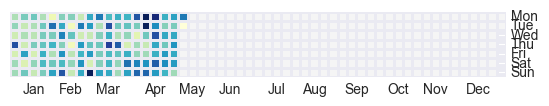

In [15]:
# Convert 'Created Date' to datetime
noise['Created Date'] = pd.to_datetime(noise['Created Date'])
# Group data by Created date and count complaints
daily_complaints = noise.groupby(pd.Grouper(key="Created Date", freq="D")).size()
calmap.yearplot(daily_complaints, year=2024, cmap='YlGnBu')

In [17]:

noise['Latitude'] = pd.to_numeric(noise['Latitude'])
# Repeat for 'Longitude' if necessary
noise['Longitude'] = pd.to_numeric(noise['Longitude'])

gdf = gpd.GeoDataFrame(
    noise, geometry=gpd.points_from_xy(noise.Longitude, noise.Latitude)
)

# Ensure 'Borough' column exists and contains valid borough names

In [18]:
boroughs = gdf["Borough"].unique()
borough_data = {borough: gdf[gdf["Borough"] == borough] for borough in boroughs}


In [19]:
for borough, data in borough_data.items():
    print(borough)
    
    

BRONX
MANHATTAN
QUEENS
BROOKLYN
STATEN ISLAND


AttributeError: 'NoneType' object has no attribute 'to_string'

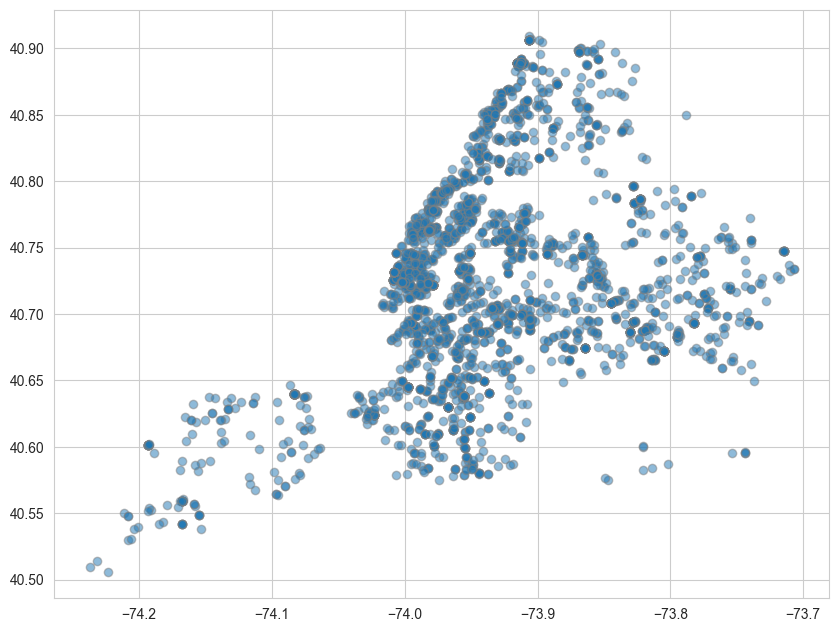

In [20]:
# Plot a google maps with seaborn
sns.set_style("whitegrid")
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor="grey")
ctx.add_basemap(ax, crs=gdf.crs.to_string())